this dataset consists of all the transaction occuring between 1/12/2010 to 9/12/2011 for an UK based non store online retail.

I aim at finding the RFM .so that the company can target it's customer efficently

R - recency (most recent purchase)
F - frequency (number of time)
M - monetry (amount of money spend)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 

In [2]:
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
df=pd.read_csv('OnlineRetail.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


percentage of null value in each coloums

In [7]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
df=df.dropna() #droped all the null value .

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df['CustomerID']=df['CustomerID'].astype(str) #customerID converted to string

first group will be of monetry

In [11]:
df['Amount']=df['UnitPrice']*df['Quantity'] #create a new col amount

In [12]:
rfm_m=df.groupby('CustomerID')['Amount'].sum()

In [13]:
rfm_m=rfm_m.reset_index()

In [14]:
rfm_m.head() #amount spend by every customer 

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


second group will be of frequency

In [15]:
rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()

In [16]:
rfm_f=rfm_f.reset_index()

In [17]:
rfm_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
rfm=pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner') # join of first and second group 
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


third group will be of recency

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


In [20]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M') #convert datatype of invoicedate to datetime.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [22]:
max_date=max(df['InvoiceDate']) 

In [23]:
df['Diff']=max_date-df['InvoiceDate'] # this col will inform us about the most recent transaction of customer .

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [25]:
rfm_r=df.groupby('CustomerID')['Diff'].min()
rfm_r=rfm_r.reset_index()
rfm_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [26]:
rfm_r['Diff']=rfm_r['Diff'].dt.days # only derive the number of days. 

In [27]:
rfm_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


finally we will merge rfm_m,rfm_r and rfm_f

In [28]:
rfm=pd.merge(rfm,rfm_r,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']

In [29]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


standard scaling of data 

In [30]:
var2=rfm.drop('CustomerID',axis=1)
st=StandardScaler()
var1=st.fit_transform(var2)
rfm_standard=pd.DataFrame(var1,columns=var2.columns)

In [31]:
rfm_standard.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


## build the model

In [43]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_standard)

KMeans(max_iter=50, n_clusters=3)

In [44]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [45]:
len(kmeans.labels_),rfm.shape

(4372, (4372, 5))

In [46]:
rfm_standard['ClusterID']=kmeans.labels_

In [47]:
rfm_standard.head()

,Amount,Frequency,Recency,ClusterID
0,-0.231001,-0.391720,2.322023,1
1,0.293432,0.382657,-0.893733,0
2,-0.012316,-0.266959,-0.169196,0
3,-0.017146,-0.086271,-0.725005,0
4,-0.190312,-0.327188,2.163220,1


In [50]:
rfm_standard['ClusterID'].value_counts()

0    3683
1     677
2      12
Name: ClusterID, dtype: int64

use of elbow method in case the n_cluster is not known or confusing 

<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

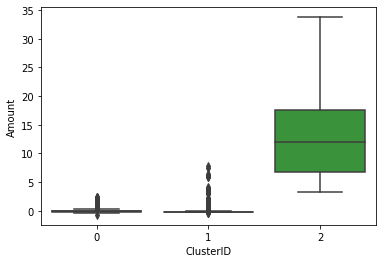

In [52]:
sea.boxplot(x='ClusterID',y='Amount',data=rfm_standard)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

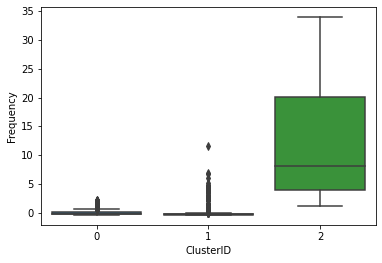

In [54]:
sea.boxplot(x='ClusterID',y='Frequency',data=rfm_standard)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

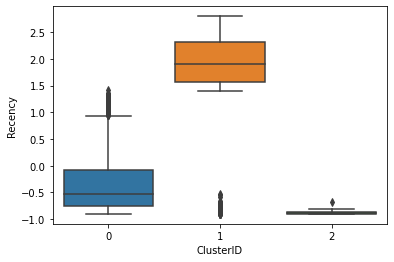

In [55]:
sea.boxplot(x='ClusterID',y='Recency',data=rfm_standard)

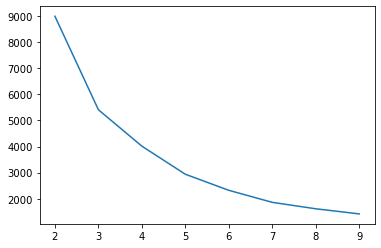

In [35]:
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8,9]
for num_cluster in range_n_cluster:
    kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
    kmeans.fit(rfm_standard)
    
    ssd.append(kmeans.inertia_)
plt.plot(range_n_cluster,ssd)